<span style = "color:gold">Wandiya James</span>

# Numerical Optimization With Python

*Contributors: Dr Yae GABA; Dr Aurelle TCHAGNA; Mr. Domini LEKO*

# Assignment_Week_Numerical Optimization


## Instructions

* This test contains **5** questions each of which should be answered.
* Write your program in a Python cell just under each question.
* You should write an explanation of your solution as comments in your code.
* In each case your solution program must fulfil all of the instructions. Please check the instructions carefully and double check that your program fulfils all of the given instructions.
* Save your work regularly.

In [7]:

import numpy as np
import scipy.linalg as sl
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

## Question 1

Consider the expression
\begin{equation}
f(x) = x \mathrm{sin}(\pi x)-\mathrm{e}^{-x}.
\end{equation}

 1. Write a function, $f$,  to evaluate this expression for a given $x$. Show that it works by plotting the function with respect to $100$ evenly spaced points between $x=-3$ and $x=3$.
 2. Write another function, $g$ that uses central finite differences to numerically evaluate the derivative of an arbitrary given function with respect to $x$ (you may assume $dx\approx0.01$). Show that it works by plotting the derivative of the function defined above between $x=-3$ and $x=3$. 
 3. Write a function that implements Newton's method for root finding. It should take as input parameters a function, $f$, whose root is to be found, its derivative function, $g$, and an initial guess, $x0$.
 4. Use your implementation of Newton's method to calculate all the roots of $f$ between $-3$ and $3$.

In [8]:
# 1. Make the f(x) function
def f(x):
    return x * np.sin(np.pi * x) - np.exp(-x) #the function

x_points = np.linspace(-3, 3, 100) #x_points from -3 to 3
y_points = f(x_points) #y_points as f(x_points)

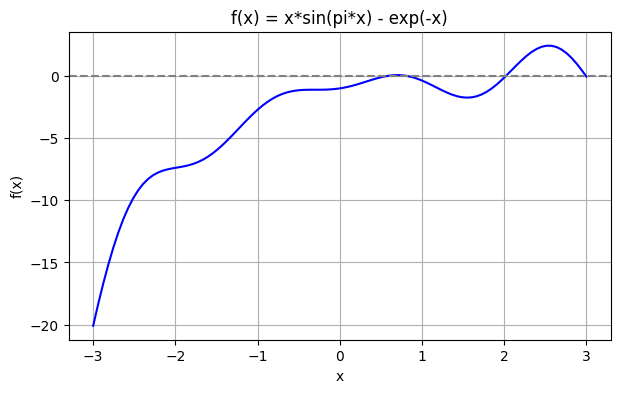

In [9]:
plt.figure(figsize=(7, 4))
plt.plot(x_points, y_points, 'b-')

# it add a horizontal line at y=0 inorder to indicate where roots are gotten
plt.axhline(y=0, color='gray', linestyle='--')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('f(x) = x*sin(pi*x) - exp(-x)') 
plt.grid(True)
plt.show() 

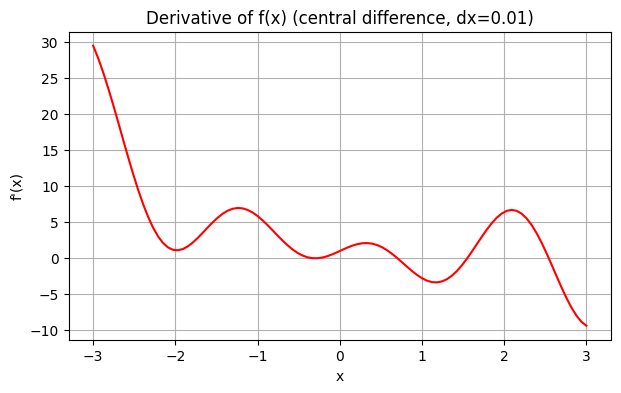

In [10]:
# 2. Make derivative function using central difference
def g(func, x, dx=0.01):
    return (func(x + dx) - func(x - dx)) / (2 * dx)

derivative = g(f, x_points, dx=0.01)


plt.figure(figsize=(7, 4))
plt.plot(x_points, derivative, 'r-')
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.title("Derivative of f(x) (central difference, dx=0.01)")
plt.grid(True)
plt.show()

In [11]:
# 3. Newton's method to find roots
def newton(f, g, x0, tol=1e-10, max_iter=50):
    x = x0
    for i in range(max_iter):
        fx = f(x)
        if abs(fx) < tol:
            return x, True
        # Here is to get derivative using our g function
        fpx = g(f, x)
        # Check if derivative is too small
        if abs(fpx) < 1e-12:  # it helps to check if the derivative is almost zero
            return x, False
        # the new Newton's formula,  x_new = x - f(x)/f'(x)
        x = x - fx / fpx
    return x, False

Roots found:
  1: x = 0.57826
  2: x = 0.81912
  3: x = 2.02089
  4: x = 2.99468


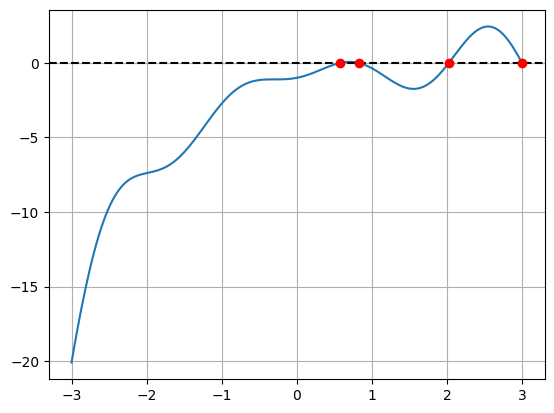

In [13]:
# 4. Find all roots from -3 to 3

# to try with different starting points gueses
starts = np.linspace(-3, 3, 30)
roots = []

for x0 in starts:
    r, ok = newton(f, g, x0)
    if ok and -3 <= r <= 3:
        # if the root is already found skip it
        found = False
        for old in roots:
            if abs(old - r) < 0.001:
                found = True
                break
        if not found:
            roots.append(r)


roots.sort()  # here i want to sort the roots and show them
print("Roots found:")
for i, r in enumerate(roots):
    print(f"  {i+1}: x = {r:.5f}")

# to Plot with the marked roots
x_plot = np.linspace(-3, 3, 200)
plt.plot(x_plot, f(x_plot))
plt.axhline(0, color='k', linestyle='--')
plt.plot(roots, [0]*len(roots), 'ro')
plt.grid(True)
plt.show()

## Question 2: singular matrices and ill-conditioning 

For the following matrixes, compute the determinant and the condition number, and classify them as singular, ill conditioned or well conditioned:
$$ (i)\quad A = 
  \begin{pmatrix}
    1 & 2 & 3 \\
    2 & 3 & 4 \\
    3 & 4 & 5 \\
  \end{pmatrix}
\quad\quad\quad\quad
(ii)\quad A = 
  \begin{pmatrix}
    2.11 & -0.80 & 1.72 \\
    -1.84 & 3.03 & 1.29 \\
    -1.57 & 5.25 & 4.30 \\
  \end{pmatrix}
$$
$$ (iii)\quad A = 
  \begin{pmatrix}
    2 & -1 & 0 \\
    -1 & 2 & -1 \\
    0 & -1 & 2 \\
  \end{pmatrix}
\quad\quad\quad\quad
(iv)\quad A = 
  \begin{pmatrix}
    4 & 3 & -1 \\
    7 & -2 & 3 \\
    5 & -18 & 13 \\
  \end{pmatrix}\,.
$$


In [14]:
# put your code here
A = np.array([[1, 2, 3],
              [2, 3, 4],
              [3, 4, 5]])
print(A)

[[1 2 3]
 [2 3 4]
 [3 4 5]]


In [15]:
# to find the determinant and condition number
det = np.linalg.det(A)
print(f"The determinant is = {det:.6f}")

if abs(det) < 0.0000001:
    print("Singular (det ≈ 0)")   
else:
    cond = np.linalg.cond(A)
    print(f"Condition number = {cond}")
    if cond > 1e10:
        print("Ill-conditioned")
    else:
        print("Well-conditioned")

The determinant is = 0.000000
Singular (det ≈ 0)


<span style = "color: gold"> Brief Explanation</span>


This matrix is  SINGULAR because, in  the third row is exactly equal to 
(2 × second row) - (first row).
When rows are linearly dependent, 
the determinant becomes zero, making the matrix non-invertible.

In [16]:
# Matrix 2
A2 = np.array([[2.11, -0.80, 1.72],
              [-1.84, 3.03, 1.29],
              [-1.57, 5.25, 4.30]])
print(A2)

[[ 2.11 -0.8   1.72]
 [-1.84  3.03  1.29]
 [-1.57  5.25  4.3 ]]


In [17]:
det = np.linalg.det(A2)
cond = np.linalg.cond(A2)
print(f"Determinant = {det}")
print(f"Condition number = {cond}")

if abs(det) < 0.0000001:
    print("Singular")
elif cond > 1e10:
    print("well-conditioned")
else:
    print("ill-conditioned")

Determinant = 0.058866999999995756
Condition number = 3218.332541480952
ill-conditioned




<span style = "color: gold"> Brief explanation:</span>

This matrix is ILL-CONDITIONED, because  the determinant is very small but not exactly zero, and the condition number is extremely big.Thus,  this means that a small changes in A will cause huge changes in x(Ax=b) solution, making computations unstable or unreliable.

In [18]:
# Matrix 3
A3 = np.array([[2, -1, 0],
              [-1, 2, -1],
              [0, -1, 2]])
print(A3)

[[ 2 -1  0]
 [-1  2 -1]
 [ 0 -1  2]]


In [19]:
det = np.linalg.det(A3)
cond = np.linalg.cond(A3)
print(f"Determinant = {det}")
print(f"Condition number = {cond}")

if abs(det) < 0.0000001:
    print("Singular")
elif cond > 1e10:
    print("Ill-conditioned")
else:
    print("Well-conditioned")

Determinant = 4.0
Condition number = 5.8284271247461925
Well-conditioned


<span style = "color: gold">Breif explanation: </span>

This matrix is WELL-CONDITIONED because  it is symmetric and diagonally dominant (each diagonal element is larger than sum of other elements in its row). The condition number is small, meaning it's numerically stable and reliable for computations.

## Question 3

Consider the list of x, y values:
```python
data = [[-0.9337935465228038, -0.07232476432206313], [-0.8579378359997711, -0.13887855006418778], [-0.9335374315243639, -0.06891805360643874], [-0.7687972106343928, 0.47854185044762787], [-0.7306837856905433, -0.47459494645121353], [-0.6828439321703356, -0.41364008798454377], [-1.0453664566329348, 0.19076506315493422], [-0.7456706490538763, -0.16083773809180218], [-0.7901894271258242, -0.35580360448848314], [-0.8928261346578745, -0.11441585592065782], [-0.841112498251017, 0.11011089888857295], [-0.7623488411754865, 0.18998754343916874], [-0.6925391941737394, -0.13413672359866718], [-0.6902708987539867, 0.03828838507783988], [-0.6687088543845848, -0.19894131765469594], [-0.6665302769372866, -0.1029760373482482], [-0.6420064312909557, -0.6554448913215021], [-0.5758230731110595, -0.5507175277632846], [-0.5756193577065919, -0.34173252704827584], [-0.4792448826592391, -0.7787912310124582], [-0.6408469813365063, -0.12147511680925833], [-0.5280178683517309, -0.5925774412972209], [-0.40380128700592666, 0.20900480487662598], [-0.4984729502442131, -0.7298392143009301], [-0.5446041323420464, -0.1640781007153601], [-0.48747960814661245, -0.261758542806879], [-0.5799087987763005, 0.01804472171650212], [-0.6001204968913751, -0.5173128958933764], [-0.5408366062285066, 0.2537613288571337], [-0.38110795902977784, -0.07330724873760994], [-0.5422499914727943, 0.021055251264383623], [-0.3588024164475623, -0.755308535619374], [-0.33248783543679084, -0.008535064734786574], [-0.5582457235994508, -0.4842740932690006], [-0.3221863564430907, 0.1525219788206888], [-0.3376212171114362, -0.15341217619428396], [-0.39166347962454356, -0.6316948130034112], [-0.23787007932215568, -0.626007030754575], [-0.12822641744709634, -0.49711343442847833], [-0.28780735187386897, -0.37401187442144845], [-0.2256289613091519, 0.42738543296089865], [-0.20967109085646085, -0.619832692105101], [0.049888337755669365, 0.07915019745819946], [-0.29567608376539767, -0.31023915589187206], [-0.026948425628742695, 0.25493770689048956], [-0.12691953366494887, -0.000909766036063589], [0.0644530895546884, -0.205614968739875], [-0.05421300377705436, 0.211270578336775], [-0.06773437907785596, -0.09404837529816071], [-0.08781953252002822, 0.4950172941365908], [0.1699783081462978, 0.04161833622202843], [-0.015524186031637438, 0.22888636161025255], [0.008431200904915698, -0.02428090691926993], [-0.012386785181722981, 0.09795380692075228], [0.1277714124907157, -0.1874700571343013], [0.05054549789429795, 0.01592527917293688], [0.22749579269721798, 0.36379096097487046], [0.13743820699257583, -0.13891144826473859], [0.011471149555491, 0.1596722795790772], [0.05940794372674682, -0.32432081194482404], [0.13757854768355646, 0.3445671139522366], [0.1647342343696234, -0.48672945291370273], [0.3901805474982435, 0.6740568752219067], [0.33397353376989003, 0.12542170513026485], [0.27723736088095224, -0.03880151513955743], [0.38027666377788694, 0.7188557769489713], [0.3039163622444417, 0.07299778741917612], [0.6206624890731296, 0.9760489756301297], [0.5179747935391051, 0.3641031631630265], [0.4923430557432943, 0.9238785497199989], [0.46780794329346204, 0.6315111432675516], [0.4349339208558625, 0.3845871247746798], [0.45053806993654766, 0.6847996631379732], [0.21407435217987014, 0.3125141886595262], [0.5936872371231747, 0.7140765515168056], [0.6143326130353116, 1.1045884421566523], [0.45210706477963847, 0.727440701294205], [0.48206791039922003, 0.0717294265808559], [0.6436467903498477, 0.747405161550199], [0.6217065866496854, 0.39358816921264717], [0.5077833980215545, 0.674852145544422], [0.5745755859495608, 1.217034240831342], [0.7945208778948454, 0.9388653585165085], [0.6874241835639029, 1.069054319183201], [0.7488172156422873, 1.3002883281857642], [0.7607457564824649, 1.1948244526119254], [0.7462485211152293, 1.2638984837102047], [0.8087906167850747, 1.6545261032878231], [0.9132613752044277, 1.51614396744652], [0.8457699554666472, 1.4824871685995005], [0.5402299927752592, 0.6045922483701612], [0.7770802222320328, 1.312219056607684], [0.5727071199546903, 0.9936874484935464], [0.8076276071584211, 1.9310943625200159], [0.9755851889094171, 2.330122777836598], [0.7543547773142139, 1.5118303380132634], [1.060512671008649, 2.1901761853146957], [1.0912226101509486, 2.0810305800930875], [0.9349382603088677, 2.356766292026297], [0.9474314681471394, 2.0685863572622636]]
```
1.  Fit polynomials of orders 0, 1, 2 and 3 to the data. Plot the raw point data and each of the polynomials.  <sub>[20 marks]</sub>
* Print out the error of each polynomil fit, where the error is defined as the sum of the squares of the differences between the data provided and the polynomial,$$E = \sum_{i=0}^{N} (p(x_i) - y_i)^2,$$ where $p(x_i)$ is the value of the polynomial function that has been fit to the data evaluated at point $x_i$, and $y_i$ is the $i^{th}$ data value.
* Fit a 10th order polynomial to the data. Plot the polynomial from x=-1.2 to x=1.2 and print out the error. Is this a better representation of the data; justify your answer. 

In [20]:
# put your code here

data = [[-0.9337935465228038, -0.07232476432206313], [-0.8579378359997711, -0.13887855006418778], [-0.9335374315243639, -0.06891805360643874], [-0.7687972106343928, 0.47854185044762787], [-0.7306837856905433, -0.47459494645121353], [-0.6828439321703356, -0.41364008798454377], [-1.0453664566329348, 0.19076506315493422], [-0.7456706490538763, -0.16083773809180218], [-0.7901894271258242, -0.35580360448848314], [-0.8928261346578745, -0.11441585592065782], [-0.841112498251017, 0.11011089888857295], [-0.7623488411754865, 0.18998754343916874], [-0.6925391941737394, -0.13413672359866718], [-0.6902708987539867, 0.03828838507783988], [-0.6687088543845848, -0.19894131765469594], [-0.6665302769372866, -0.1029760373482482], [-0.6420064312909557, -0.6554448913215021], [-0.5758230731110595, -0.5507175277632846], [-0.5756193577065919, -0.34173252704827584], [-0.4792448826592391, -0.7787912310124582], [-0.6408469813365063, -0.12147511680925833], [-0.5280178683517309, -0.5925774412972209], [-0.40380128700592666, 0.20900480487662598], [-0.4984729502442131, -0.7298392143009301], [-0.5446041323420464, -0.1640781007153601], [-0.48747960814661245, -0.261758542806879], [-0.5799087987763005, 0.01804472171650212], [-0.6001204968913751, -0.5173128958933764], [-0.5408366062285066, 0.2537613288571337], [-0.38110795902977784, -0.07330724873760994], [-0.5422499914727943, 0.021055251264383623], [-0.3588024164475623, -0.755308535619374], [-0.33248783543679084, -0.008535064734786574], [-0.5582457235994508, -0.4842740932690006], [-0.3221863564430907, 0.1525219788206888], [-0.3376212171114362, -0.15341217619428396], [-0.39166347962454356, -0.6316948130034112], [-0.23787007932215568, -0.626007030754575], [-0.12822641744709634, -0.49711343442847833], [-0.28780735187386897, -0.37401187442144845], [-0.2256289613091519, 0.42738543296089865], [-0.20967109085646085, -0.619832692105101], [0.049888337755669365, 0.07915019745819946], [-0.29567608376539767, -0.31023915589187206], [-0.026948425628742695, 0.25493770689048956], [-0.12691953366494887, -0.000909766036063589], [0.0644530895546884, -0.205614968739875], [-0.05421300377705436, 0.211270578336775], [-0.06773437907785596, -0.09404837529816071], [-0.08781953252002822, 0.4950172941365908], [0.1699783081462978, 0.04161833622202843], [-0.015524186031637438, 0.22888636161025255], [0.008431200904915698, -0.02428090691926993], [-0.012386785181722981, 0.09795380692075228], [0.1277714124907157, -0.1874700571343013], [0.05054549789429795, 0.01592527917293688], [0.22749579269721798, 0.36379096097487046], [0.13743820699257583, -0.13891144826473859], [0.011471149555491, 0.1596722795790772], [0.05940794372674682, -0.32432081194482404], [0.13757854768355646, 0.3445671139522366], [0.1647342343696234, -0.48672945291370273], [0.3901805474982435, 0.6740568752219067], [0.33397353376989003, 0.12542170513026485], [0.27723736088095224, -0.03880151513955743], [0.38027666377788694, 0.7188557769489713], [0.3039163622444417, 0.07299778741917612], [0.6206624890731296, 0.9760489756301297], [0.5179747935391051, 0.3641031631630265], [0.4923430557432943, 0.9238785497199989], [0.46780794329346204, 0.6315111432675516], [0.4349339208558625, 0.3845871247746798], [0.45053806993654766, 0.6847996631379732], [0.21407435217987014, 0.3125141886595262], [0.5936872371231747, 0.7140765515168056], [0.6143326130353116, 1.1045884421566523], [0.45210706477963847, 0.727440701294205], [0.48206791039922003, 0.0717294265808559], [0.6436467903498477, 0.747405161550199], [0.6217065866496854, 0.39358816921264717], [0.5077833980215545, 0.674852145544422], [0.5745755859495608, 1.217034240831342], [0.7945208778948454, 0.9388653585165085], [0.6874241835639029, 1.069054319183201], [0.7488172156422873, 1.3002883281857642], [0.7607457564824649, 1.1948244526119254], [0.7462485211152293, 1.2638984837102047], [0.8087906167850747, 1.6545261032878231], [0.9132613752044277, 1.51614396744652], [0.8457699554666472, 1.4824871685995005], [0.5402299927752592, 0.6045922483701612], [0.7770802222320328, 1.312219056607684], [0.5727071199546903, 0.9936874484935464], [0.8076276071584211, 1.9310943625200159], [0.9755851889094171, 2.330122777836598], [0.7543547773142139, 1.5118303380132634], [1.060512671008649, 2.1901761853146957], [1.0912226101509486, 2.0810305800930875], [0.9349382603088677, 2.356766292026297], [0.9474314681471394, 2.0685863572622636]]

In [21]:
x_data_extracted = [point[0] for point in data]
y_data_extracted = [point[1] for point in data]

#### to view my x_data

In [22]:
x_data_extracted

[-0.9337935465228038,
 -0.8579378359997711,
 -0.9335374315243639,
 -0.7687972106343928,
 -0.7306837856905433,
 -0.6828439321703356,
 -1.0453664566329348,
 -0.7456706490538763,
 -0.7901894271258242,
 -0.8928261346578745,
 -0.841112498251017,
 -0.7623488411754865,
 -0.6925391941737394,
 -0.6902708987539867,
 -0.6687088543845848,
 -0.6665302769372866,
 -0.6420064312909557,
 -0.5758230731110595,
 -0.5756193577065919,
 -0.4792448826592391,
 -0.6408469813365063,
 -0.5280178683517309,
 -0.40380128700592666,
 -0.4984729502442131,
 -0.5446041323420464,
 -0.48747960814661245,
 -0.5799087987763005,
 -0.6001204968913751,
 -0.5408366062285066,
 -0.38110795902977784,
 -0.5422499914727943,
 -0.3588024164475623,
 -0.33248783543679084,
 -0.5582457235994508,
 -0.3221863564430907,
 -0.3376212171114362,
 -0.39166347962454356,
 -0.23787007932215568,
 -0.12822641744709634,
 -0.28780735187386897,
 -0.2256289613091519,
 -0.20967109085646085,
 0.049888337755669365,
 -0.29567608376539767,
 -0.026948425628742695

#### to view my y_data

In [23]:
y_data_extracted

[-0.07232476432206313,
 -0.13887855006418778,
 -0.06891805360643874,
 0.47854185044762787,
 -0.47459494645121353,
 -0.41364008798454377,
 0.19076506315493422,
 -0.16083773809180218,
 -0.35580360448848314,
 -0.11441585592065782,
 0.11011089888857295,
 0.18998754343916874,
 -0.13413672359866718,
 0.03828838507783988,
 -0.19894131765469594,
 -0.1029760373482482,
 -0.6554448913215021,
 -0.5507175277632846,
 -0.34173252704827584,
 -0.7787912310124582,
 -0.12147511680925833,
 -0.5925774412972209,
 0.20900480487662598,
 -0.7298392143009301,
 -0.1640781007153601,
 -0.261758542806879,
 0.01804472171650212,
 -0.5173128958933764,
 0.2537613288571337,
 -0.07330724873760994,
 0.021055251264383623,
 -0.755308535619374,
 -0.008535064734786574,
 -0.4842740932690006,
 0.1525219788206888,
 -0.15341217619428396,
 -0.6316948130034112,
 -0.626007030754575,
 -0.49711343442847833,
 -0.37401187442144845,
 0.42738543296089865,
 -0.619832692105101,
 0.07915019745819946,
 -0.31023915589187206,
 0.254937706890489

In [24]:
x = np.array(x_data_extracted)
y = np.array(y_data_extracted)

In [25]:
def fit_polynomial(degree):
    coefficients = np.polyfit(x, y, degree)
    polynomial = np.poly1d(coefficients)

    
    y_prediction = polynomial(x)
    error = np.sum((y_prediction - y) ** 2)

    return polynomial, error

In [42]:
poly0, error0 = fit_polynomial(0)  # degree 0 as a constant
poly1, error1 = fit_polynomial(1)  # degree 1 as a linear
poly2, error2 = fit_polynomial(2)  # degree 2 as a quadratic
poly3, error3 = fit_polynomial(3)  # degree 3 as a cubic

In [28]:
print(f"Degree 0 error(fit poly 0): {error0}")
print(f"Degree 1 error(fit poly 1): {error1}")
print(f"Degree 2 error(fit poly 2): {error2}")
print(f"Degree 3 error(fit poly 3): {error3}")

Degree 0 error(fit poly 0): 54.62753491233334
Degree 1 error(fit poly 1): 19.773946100330257
Degree 2 error(fit poly 2): 8.345970363370766
Degree 3 error(fit poly 3): 8.304822541013555


#### Here I want to make  plot for each of them  for visualization of results

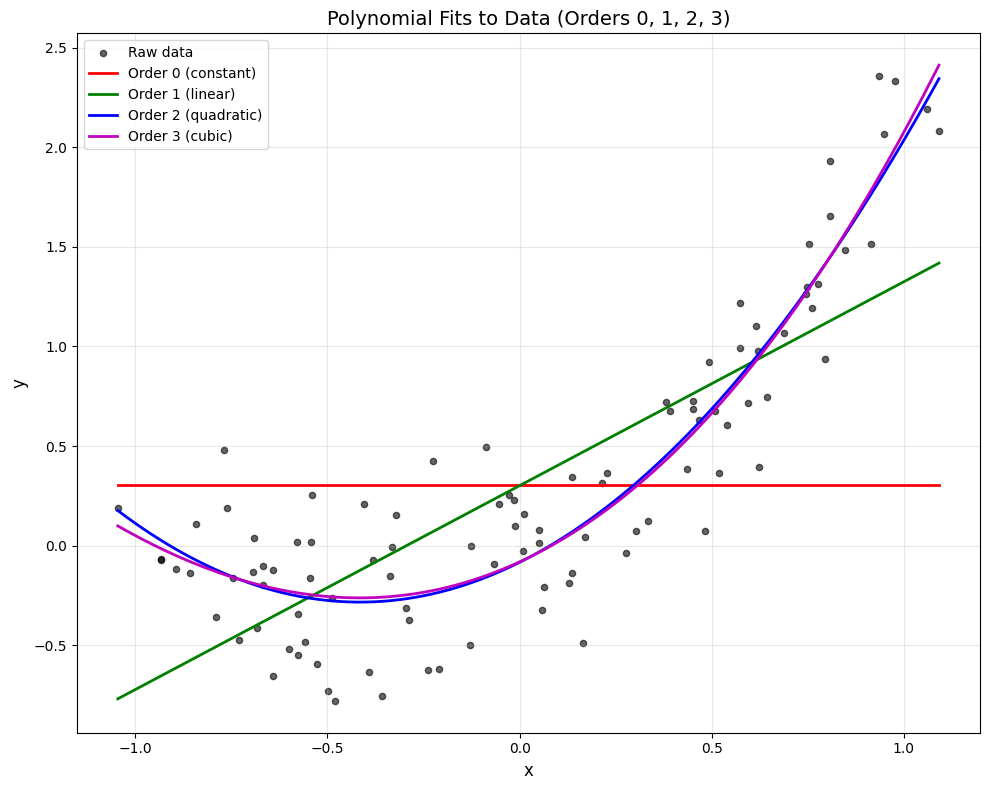

In [44]:
# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(x, y, color='black', alpha=0.6, s=20, label='Raw data')

x_smooth = np.linspace(min(x), max(x), 200)
plt.plot(x_smooth, poly0(x_smooth), 'r-', linewidth=2, label='Order 0 (constant)')
plt.plot(x_smooth, poly1(x_smooth), 'g-', linewidth=2, label='Order 1 (linear)')
plt.plot(x_smooth, poly2(x_smooth), 'b-', linewidth=2, label='Order 2 (quadratic)')
plt.plot(x_smooth, poly3(x_smooth), 'm-', linewidth=2, label='Order 3 (cubic)')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Polynomial Fits to Data (Orders 0, 1, 2, 3)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()

plt.show()

<span style = "color:gold">Brief explanation</span>

Based on the above plot, looking intently. You will discover that the degree 2 polynimal fit well because its more better, it captures the curve and has a good balance with less error

the below solution is for degree polynomial degree 10

In [30]:
coefficient_10 = np.polyfit(x, y, 10)
p10 = np.poly1d(coefficient_10)
error10 = np.sum((p10(x) - y)**2)

print(f"Degree 10 error: {error10}")

Degree 10 error: 7.551314385591965


This one below is for the Plot from x=-1.2 to 1.2

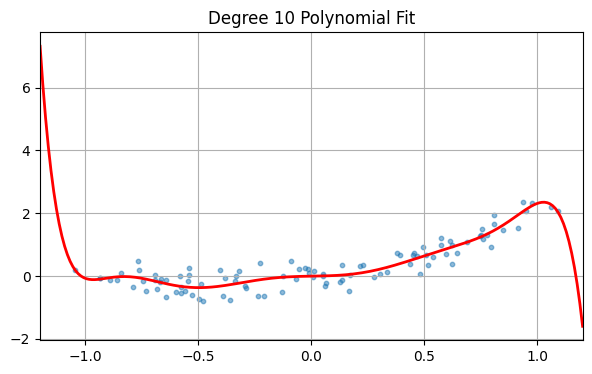

In [31]:
x_plot = np.linspace(-1.2, 1.2, 200)

plt.figure(figsize=(7, 4))
plt.scatter(x, y, s=10, alpha=0.5)
plt.plot(x_plot, p10(x_plot), 'r-', linewidth=2)
plt.xlim(-1.2, 1.2)
plt.title('Degree 10 Polynomial Fit')
plt.grid(True)
plt.show()

To print and check for error values

In [32]:
print(f"Degree 0:  {error0}")
print(f"Degree 1:  {error1}")
print(f"Degree 2:  {error2}")
print(f"Degree 3:  {error3}")
print(f"Degree 10: {error10}")

Degree 0:  54.62753491233334
Degree 1:  19.773946100330257
Degree 2:  8.345970363370766
Degree 3:  8.304822541013555
Degree 10: 7.551314385591965


<span style = "color: gold">Brief explanation</span>

From the above results, 

the degree  10 is overfits and not better because 


The degree 10 fits noise and not the pattern required based on the plot. That means it overfits despites it has a lower error but it has not a smooth curve. its wiggly and may not accept new data. 

## Question 4

Below is a extract of shot data from a seismic survey.

|  Time (ms)  |  Shot  |
|-----|-----|
| 0 | -0.021373 |
| 4 | -0.024578 |
| 8 | -0.023914 |
| 12 | -0.018227 |
| 16 | -0.00781 |
| 20 | 0.005602 |
| 24 | 0.019264 |
| 28 | 0.030235 |
| 32 | 0.036059 |
| 36 | 0.035334 |

 1. Calculate the Lagrange polynomial for these points. Plot both the Lagrange polynomial and the raw data points.
 2. The full shot is available in the file [shot.txt](data/shot.txt) (in the data folder) - where the sample interval is 4ms as above. Note that the file only contains one column as you can calculate the time column yourself. Use cubic-polynomial splines to re-interpolate the data for a sample interval of 7.07ms. Plot both the original shot data and the interpolated time series.


In [33]:
# put your code here
shot_text_data = np.loadtxt('data/shot.txt')
print(shot_text_data)

[ 0.        0.        0.       ... -0.013061 -0.003343  0.      ]


In [34]:
time = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])

shot = np.array([-0.021373, -0.024578, -0.023914, -0.018227, -0.00781,
                 0.005602, 0.019264, 0.030235, 0.036059, 0.035334])

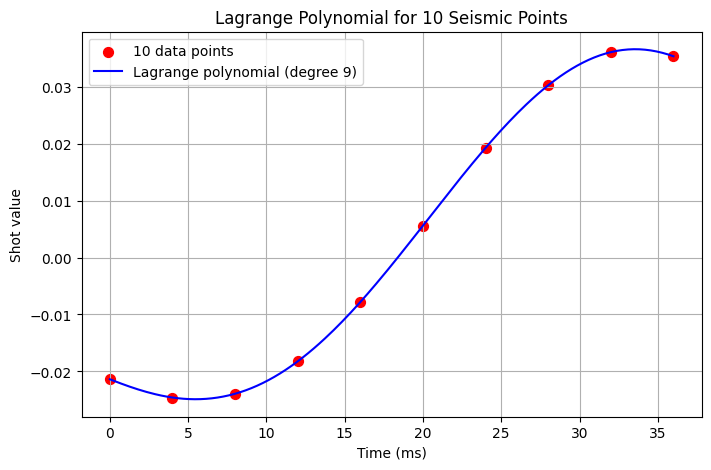

In [35]:
# Create smooth points for plotting
time_points = np.linspace(0, 36, 200)
shot_points = []
for t in time_points:
    shot_points.append(lagrange(t, time, shot))

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(time, shot, color='red', s=50, label='10 data points')
plt.plot(time_points, shot_points, 'b-', label='Lagrange polynomial (degree 9)')
plt.xlabel('Time (ms)')
plt.ylabel('Shot value')
plt.title('Lagrange Polynomial for 10 Seismic Points')
plt.grid(True)
plt.legend()
plt.show()

In [36]:
# Lagrange function
def lagrange(x_point, x_data_point, y_data_point):
    result = 0
    n = len(x_data_point)
    for i in range(n):
        term = y_data_point[i]
        for j in range(n):
            if j != i:
                term *= (x_point - x_data_point[j]) / (x_data_point[i] - x_data_point[j])
        result += term
    return result

In [37]:
shot_data = shot_text_data
n = len(shot_data)
original_time = np.arange(0, n * 4, 4)

cubic_spline = CubicSpline(original_time, shot_data)

In [39]:
new_time = np.arange(0, original_time[-1],7.07) # creating new time points with 7.07 intervals

interpolation_data = cubic_spline(new_time)

In [40]:
print(f"original: {len(shot_data)} points, 4ms interval")
print(f"interpolated: {len(interpolation_data)} points, 7.07ms interval")

original: 1001 points, 4ms interval
interpolated: 566 points, 7.07ms interval


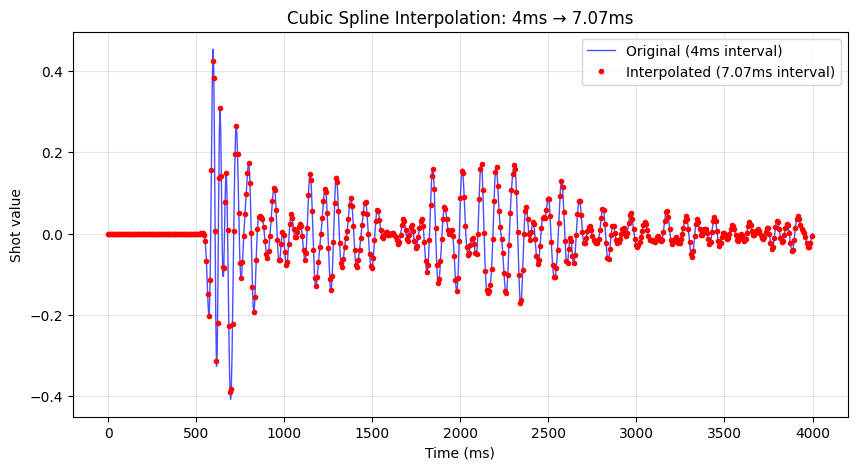

In [41]:
# to plot for the original data 
plt.figure(figsize=(10, 5))
plt.plot(original_time, shot_data, 'b-', linewidth=1, alpha=0.7, 
         label='Original (4ms interval)')

# Plot interpolated data
plt.plot(new_time, interpolation_data, 'ro', markersize=3, 
         label='Interpolated (7.07ms interval)')

plt.xlabel('Time (ms)')
plt.ylabel('Shot value')
plt.title('Cubic Spline Interpolation: 4ms → 7.07ms')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

## Question 5

Consider the usual linear system $A\pmb{x} = \pmb{b}$, of dimension $n$, where $\pmb{x}$ is the unknown vector, $A$ is a given square matrix and $\pmb{b}$ is a given vector.

The weighted Jacobi method is a variant of Jacobi's method to solve a linear system of equations. The idea of the modified algorithm is to take the new value of $\pmb{x}$ as a weighted average of its previous value and the value predicted by the regular Jacobi iteration. In other words the $k^{th}$ iteration of the algorithm is changed into:
$$x_i^{(k)} = \frac{\omega}{A_{ii}}\left(b_i- \sum_{\substack{j=1\\ j\ne i}}^nA_{ij}x_j^{(k-1)}\right) + (1-\omega)x_i^{(k-1)},\quad  i=1,2,\ldots, n.$$



1. Explain what the algorithm does for $\omega = 0$ and for $\omega = 1$. <sub>[10 marks]</sub>

2. Write a function that solves a system with the weighted Jacobi's algorithm, for given $A$, $\pmb{b}$ and $\omega$. <sub>[10 marks]</sub>

3. Consider the following linear system:
$$  
\left\{
\begin{array}{lcl}
  10 x_1 - x_2 + 2 x_3  &=& 6 \\ 
  - x_1 +  11 x_2 - x_3 + 3 x_4 &=& 25 \\ 
  2 x_1  - x_2 + 10 x_3 - x_4 &=& -11 \\
           3 x_2 - x_3 + 8 x_4 &=& 15 
  \end{array}
\right.
$$
Write this system in matrix form. Verify that there is one and only one solution. 

4. Solve the previous problem using your weighted Jacobi function for $\omega = 0.5$ to a tolerance of $10^{-4}$, and check your answer. 

5. Solve the previous problem with the weighted Jacobi method, for $\omega = 0.3, 0.5, 0.7, 0.8, 0.9, 0.95$ and $1$. Perform 10 iterations of the weighted Jacobi algorithm. On the same plot, plot the residual as a function of the jacobi iteration number for each $\omega$. Deduce the best value for $\omega$ among the proposed values.



In [59]:
def wjacobi(A, b, omega, x0, max_iterations=1000, tol=1e-4):
    n = len(b)
    x = x0.copy()       
    x_new = np.zeros(n)  
    
    for k in range(max_iterations): 
        for i in range(n):
            sum_of_others = 0
            for j in range(n):
                if j != i:
                    sum_of_others += A[i,j] * x[j]
            
            x_new[i] = (omega/A[i,i]) * (b[i] - sum_of_others) + (1-omega)*x[i]
        
        r = np.linalg.norm(A @ x_new - b)
        if r < tol:
            return x_new, k+1
        
        x = x_new.copy()  
    
    return x, max_iterations

The above defined the function to help compute the next task

Matrix calculation

In [55]:
A = np.array([[10, -1, 2, 0],
              [-1, 11, -1, 3],
              [2, -1, 10, -1],
              [0, 3, -1, 8]])
print(A)

[[10 -1  2  0]
 [-1 11 -1  3]
 [ 2 -1 10 -1]
 [ 0  3 -1  8]]


In [56]:
b = np.array([6, 25, -11, 15])
print("The Vector b:", b)

The Vector b: [  6  25 -11  15]


To calculate the determinant 

In [57]:
detA = np.linalg.det(A)
print(f"Determinant = {detA}")
if abs(detA) > 0.0001:
    print("One unique solution exists")
else:
    print("No unique solution")

Determinant = 7394.999999999988
One unique solution exists


In [60]:
# Initial guess
x0 = np.zeros(4)
x_solution, iterations = wjacobi(A, b, 0.5, x0, tol=1e-4)

print(f"Solution with ω=0.5 (took {iterations} iterations):")
print( x_solution)

Solution with ω=0.5 (took 29 iterations):
[ 0.99999605  1.99999227 -0.99999715  1.00000943]


In [53]:
# trying to Check
check = A @ x_solution - b
print("Check Ax - b =", check)
print("Max error =", np.max(np.abs(check)))

Check Ax - b = [-2.60651123e-05 -5.56088247e-05  1.88923158e-05  4.94057378e-05]
Max error = 5.560882471300488e-05


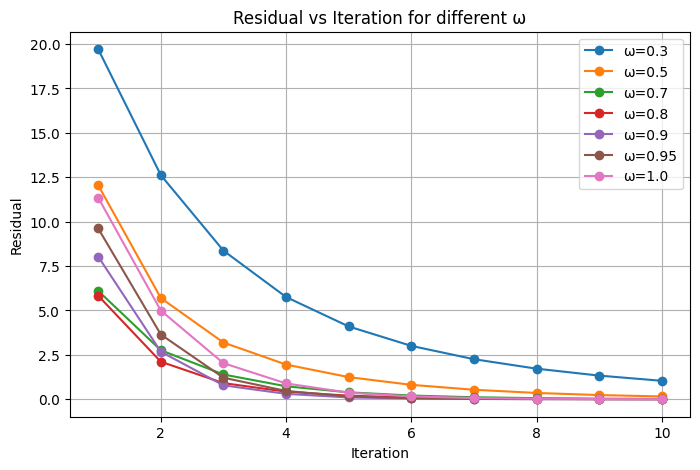

In [62]:
omegas = [0.3, 0.5, 0.7, 0.8, 0.9, 0.95, 1.0]

plt.figure(figsize=(8, 5))

for w in omegas:
    # Run for 10 iterations
    x = x0.copy()
    residuals = []
    
    for it in range(10):
        x_new = np.zeros(4)
        for var in range(4):
            sum_off_diag = 0
            for index_sum in range(4):
                if index_sum != var:
                    sum_off_diag += A[var,index_sum] * x[index_sum]
            x_new[var] = (w/A[var,var]) * (b[var] - sum_off_diag) + (1-w)*x[var]
        
        resid = np.linalg.norm(A @ x_new - b)
        residuals.append(resid)
        x = x_new.copy()
    
    plt.plot(range(1, 11), residuals, 'o-', label=f'ω={w}')

plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.title('Residual vs Iteration for different ω')
plt.grid(True)
plt.legend()
plt.show()

### for residual after 10 iterations 

In [63]:
best_w = 0.3
best_r = 1000

for w in omegas:
    x = x0.copy()
    for it in range(10):
        x_new = np.zeros(4)
        for i in range(4):
            s = 0
            for j in range(4):
                if j != i:
                    s += A[i,j] * x[j]
            x_new[i] = (w/A[i,i]) * (b[i] - s) + (1-w)*x[i]
        x = x_new.copy()
    
    r = np.linalg.norm(A @ x - b)
    print(f"ω={w}: residual = {r}")
    
    if r < best_r:
        best_r = r
        best_w = w

print(f"\nBest ω = {best_w} (lowest residual or error)")

ω=0.3: residual = 1.0382888187783905
ω=0.5: residual = 0.15705192086833417
ω=0.7: residual = 0.017568115195340957
ω=0.8: residual = 0.0048193816968501715
ω=0.9: residual = 0.0011073067357485783
ω=0.95: residual = 0.0010126921730744469
ω=1.0: residual = 0.005260793263327165

Best ω = 0.95 (lowest residual or error)
